In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('final.csv')

In [16]:
df = data.copy()
df.head()

,rating_stars,number_of_reviews,bought_last_month,original_mrp,discount%,free_delivery,storage_in_GB,RAM_in_GB,brand_apple,brand_oneplus,...,color_Purple,color_Red,color_Silver,color_Space Black,color_Starlight,color_Teal,color_Ultramarine,color_White,color_White Titanium,color_Yellow
0,0.75,-0.177400,-0.287376,0.471377,-0.446154,-1,-0.658974,-0.653572,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.70,-0.177676,-0.370727,0.464980,-0.476923,-1,-0.658974,-0.653572,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.75,0.347235,3.713474,0.044889,-0.261538,-1,-0.658974,-0.653572,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.75,0.264074,3.713474,0.038491,-0.261538,-1,-0.658974,-0.653572,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.75,0.024048,3.713474,0.044889,-0.261538,-1,-0.658974,-0.653572,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Identify target columns
target_columns = ['discount%', 'free_delivery']
correlation_matrix = df.corr()

# Extract correlations of features with targets
correlation_with_targets = correlation_matrix[target_columns].drop(index=target_columns, errors='ignore')

# Retain features with |correlation| > 0.2 for discount%
selected_features_discount = correlation_with_targets[abs(correlation_with_targets['discount%']) > 0.2]

# Retain features with |correlation| > 0.2 for free_delivery
selected_features_free_delivery = correlation_with_targets[abs(correlation_with_targets['free_delivery']) > 0.2]

# Display results
print("Selected Features for discount% (|correlation| > 0.2):")
print(selected_features_discount[['discount%']])

print("\nSelected Features for free_delivery (|correlation| > 0.2):")
print(selected_features_free_delivery[['free_delivery']])



Selected Features for discount% (|correlation| > 0.2):
               discount%
rating_stars   -0.262660
original_mrp   -0.240558
storage_in_GB  -0.238116
brand_apple    -0.343113
brand_xiaomi    0.330027

Selected Features for free_delivery (|correlation| > 0.2):
                   free_delivery
rating_stars           -0.231005
bought_last_month       0.247362
original_mrp           -0.364294
brand_apple            -0.551853
brand_samsung           0.221563
brand_xiaomi            0.218408


**discount%** -> rating_stars , original_mrp , storage_in_GB , brand_apple , brand_xiaomi

**free_delivery** -> rating_stars , bought_last_month , original_mrp , brand_apple , brand_xiaomi , brand_samsung

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

# Separate features and targets
X = data.drop(columns=['discount%', 'free_delivery'])
y_classification = data['free_delivery']
y_regression = data['discount%']

# Feature selection for classification
selector_classif = SelectKBest(score_func=f_classif, k='all')
X_selected_classif = selector_classif.fit_transform(X, y_classification)

# Feature selection for regression
selector_regress = SelectKBest(score_func=f_regression, k='all')
X_selected_regress = selector_regress.fit_transform(X, y_regression)

# Scores and selected features
classif_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector_classif.scores_
}).sort_values(by='Score', ascending=False)

regress_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector_regress.scores_
}).sort_values(by='Score', ascending=False)

print("Top Features for Classification:")
print(classif_scores)

print("\nTop Features for Regression:")
print(regress_scores)


Top Features for Classification:
                   Feature       Score
6              brand_apple  196.179318
3             original_mrp   68.551557
2        bought_last_month   29.198726
0             rating_stars   25.254438
10           brand_samsung   23.127705
12            brand_xiaomi   22.440951
13             color_Black   17.147963
5                RAM_in_GB   12.829370
8               brand_oppo    9.675644
35            color_Yellow    7.851129
33             color_White    7.774561
23  color_Natural Titanium    7.037409
4            storage_in_GB    6.442593
22          color_Midnight    6.230251
30         color_Starlight    6.230251
26            color_Purple    5.429576
34    color_White Titanium    3.847366
32       color_Ultramarine    3.847366
31              color_Teal    3.847366
18              color_Gold    3.387500
14    color_Black Titanium    3.065679
25              color_Pink    2.766924
16     color_Blue Titanium    2.290171
7            brand_oneplus    2

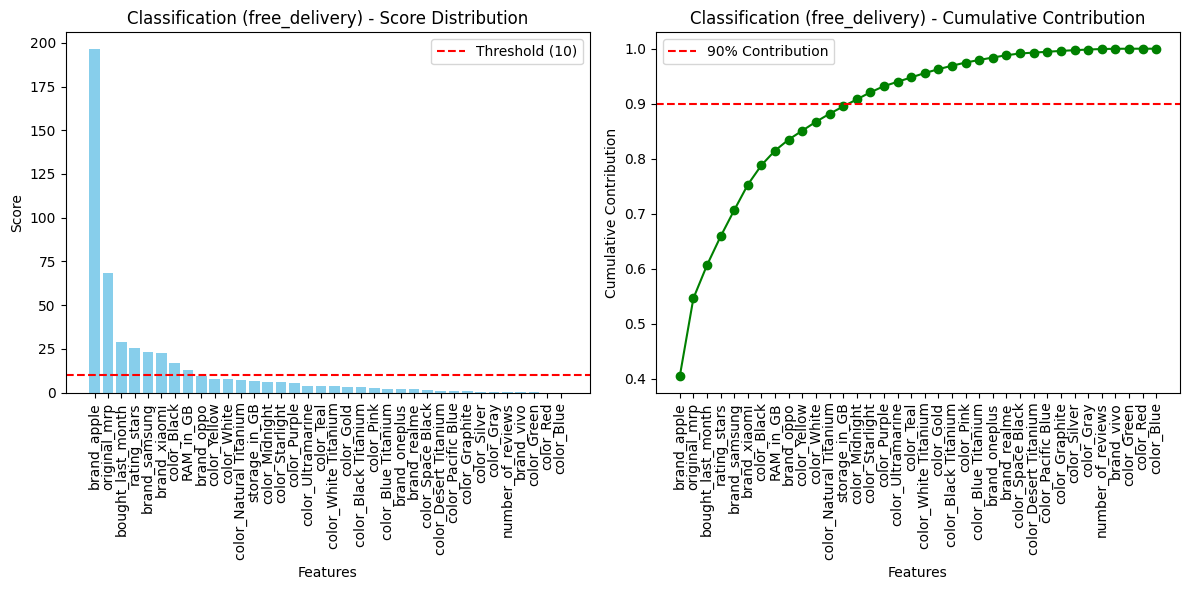

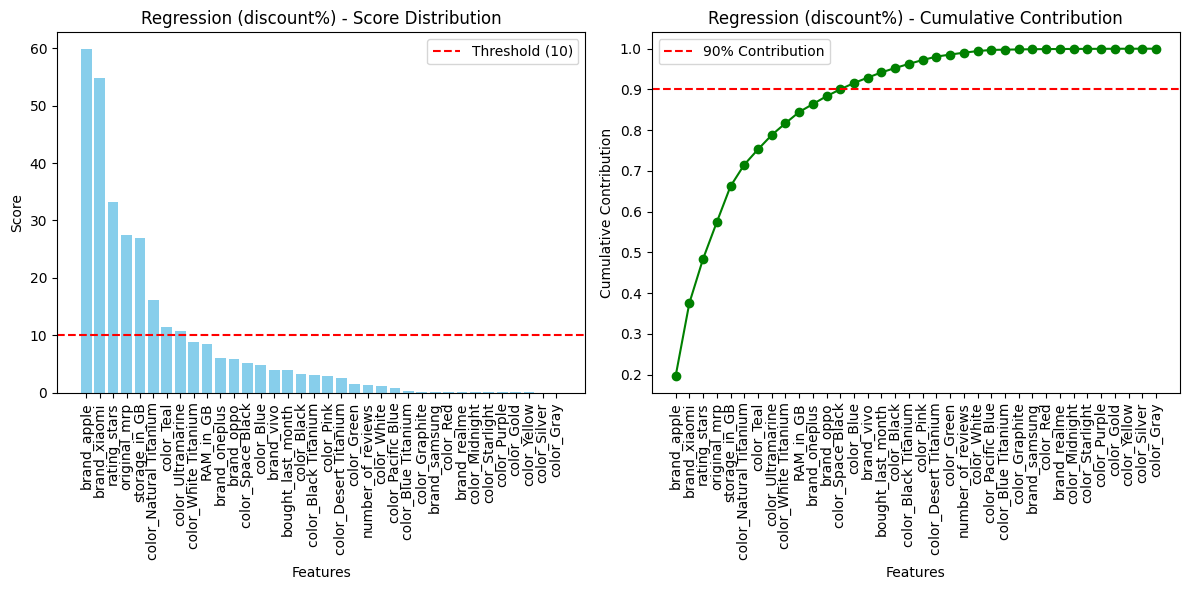

In [28]:
import numpy as np

# Function to plot distribution and cumulative contribution of scores
def plot_score_distribution(scores, task_name):
    plt.figure(figsize=(12, 6))

    # Sort scores for cumulative contribution plot
    sorted_scores = scores.sort_values(by='Score', ascending=False)
    cumulative_contribution = np.cumsum(sorted_scores['Score']) / sorted_scores['Score'].sum()

    # Plot histogram of scores
    plt.subplot(1, 2, 1)
    plt.bar(sorted_scores['Feature'], sorted_scores['Score'], color='skyblue')
    plt.axhline(10, color='red', linestyle='--', label='Threshold (10)')
    plt.xticks(rotation=90)
    plt.title(f'{task_name} - Score Distribution')
    plt.ylabel('Score')
    plt.xlabel('Features')
    plt.legend()

    # Plot cumulative contribution
    plt.subplot(1, 2, 2)
    plt.plot(sorted_scores['Feature'], cumulative_contribution, marker='o', color='green')
    plt.axhline(0.9, color='red', linestyle='--', label='90% Contribution')
    plt.xticks(rotation=90)
    plt.title(f'{task_name} - Cumulative Contribution')
    plt.ylabel('Cumulative Contribution')
    plt.xlabel('Features')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot for classification
plot_score_distribution(classif_scores, 'Classification (free_delivery)')

# Plot for regression
plot_score_distribution(regress_scores, 'Regression (discount%)')


In [32]:
# Threshold for selecting features
threshold = 10

# Classification features with scores > 10
selected_classification = classif_scores[classif_scores['Score'] > threshold]

# Regression features with scores > 10
selected_regression = regress_scores[regress_scores['Score'] > threshold]

# Display selected features
print("Selected Features for Classification (Score > 10):")
print(selected_classification)

print("\nSelected Features for Regression (Score > 10):")
print(selected_regression)


Selected Features for Classification (Score > 10):
              Feature       Score
6         brand_apple  196.179318
3        original_mrp   68.551557
2   bought_last_month   29.198726
0        rating_stars   25.254438
10      brand_samsung   23.127705
12       brand_xiaomi   22.440951
13        color_Black   17.147963
5           RAM_in_GB   12.829370

Selected Features for Regression (Score > 10):
                   Feature      Score
6              brand_apple  59.779218
12            brand_xiaomi  54.759595
0             rating_stars  33.198063
3             original_mrp  27.517297
4            storage_in_GB  26.928105
23  color_Natural Titanium  16.161582
31              color_Teal  11.458616
32       color_Ultramarine  10.771592


**discount%** -> brand_apple , brand_xiaomi , rating_stars , original_mrp , storage_in_GB , color_Natural Titanium , color_Teal ,color_Ultramarine

**free_delivery** -> brand_apple , original_mrp , bought_last_month , rating_stars , brand_samsung , brand_xiaomi ,color_Black , RAM_in_GB


-----------------------------------------------------------------------------------------------------------------------------------------------

from correlation the features are
- - - - - - - - - - - - - - - - - - - - - - - - - - - -  -
[**discount%** -> rating_stars , original_mrp , storage_in_GB , brand_apple , brand_xiaomi

**free_delivery** -> rating_stars , bought_last_month , original_mrp , brand_apple , brand_xiaomi , brand_samsung]
- - - - -
and from selectKbest 

[**discount%** -> brand_apple , brand_xiaomi , rating_stars , original_mrp , storage_in_GB , color_Natural Titanium , color_Teal ,color_Ultramarine

**free_delivery** -> brand_apple , original_mrp , bought_last_month , rating_stars , brand_samsung , brand_xiaomi ,color_Black , RAM_in_GB] lets finalize which features to take for discount% and which for free_deliery ,, as one is categorical one in number we'll have 2 models

In [33]:
#Final Features

Final Features for discount%:
**********
brand_apple, brand_xiaomi, rating_stars, original_mrp, storage_in_GB, color_Natural Titanium, color_Teal, color_Ultramarine.

free_delivery:
**************
brand_apple, brand_xiaomi, rating_stars, original_mrp, bought_last_month, brand_samsung, color_Black, RAM_in_GB.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the features and target
features = ['brand_apple', 'brand_xiaomi', 'rating_stars', 'original_mrp', 'storage_in_GB', 'color_Natural Titanium', 'color_Teal', 'color_Ultramarine']
X = df[features]
y = df['discount%']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)

# Train the model
xg_reg.fit(X_train, y_train)

# Make predictions
y_pred = xg_reg.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.15513313349099128


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the features and target
features = ['brand_apple', 'brand_xiaomi', 'rating_stars', 'original_mrp', 'storage_in_GB', 'color_Natural Titanium', 'color_Teal', 'color_Ultramarine']
X = df[features]
y = df['discount%']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_reg.predict(X_test)

# Calculate the mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")

Mean Squared Error (Random Forest): 0.07205566218764577


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the features and target
features_free_delivery = ['brand_apple', 'brand_xiaomi', 'rating_stars', 'original_mrp', 'bought_last_month', 'brand_samsung', 'color_Black', 'RAM_in_GB']
X_free_delivery = df[features_free_delivery]
y_free_delivery = df['free_delivery']

# Split the data into training and testing sets
X_train_fd, X_test_fd, y_train_fd, y_test_fd = train_test_split(X_free_delivery, y_free_delivery, test_size=0.2, random_state=42)

# Create the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train_fd, y_train_fd)

# Make predictions
y_pred_fd = rf_clf.predict(X_test_fd)

# Calculate the accuracy
accuracy = accuracy_score(y_test_fd, y_pred_fd)
print(f"Accuracy (Random Forest): {accuracy}")

Accuracy (Random Forest): 0.7444444444444445


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the features and target
features_free_delivery = ['brand_apple', 'brand_xiaomi', 'rating_stars', 'original_mrp', 'bought_last_month', 'brand_samsung', 'color_Black', 'RAM_in_GB']
X_free_delivery = df[features_free_delivery]
y_free_delivery = df['free_delivery']

# Split the data into training and testing sets
X_train_fd, X_test_fd, y_train_fd, y_test_fd = train_test_split(X_free_delivery, y_free_delivery, test_size=0.2, random_state=42)

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_fd, y_train_fd)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_fd)

# Calculate the accuracy
accuracy_log_reg = accuracy_score(y_test_fd, y_pred_log_reg)
print(f"Accuracy (Logistic Regression): {accuracy_log_reg}")

Accuracy (Logistic Regression): 0.7555555555555555


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Define the features and target
features_free_delivery = ['brand_apple', 'brand_xiaomi', 'rating_stars', 'original_mrp', 'bought_last_month', 'brand_samsung', 'color_Black', 'RAM_in_GB']
X_free_delivery = df[features_free_delivery]
y_free_delivery = df['free_delivery']

# Split the data into training and testing sets
X_train_fd, X_test_fd, y_train_fd, y_test_fd = train_test_split(X_free_delivery, y_free_delivery, test_size=0.2, random_state=42)

# Create the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_clf.fit(X_train_fd, y_train_fd)

# Make predictions with Random Forest
y_pred_rf_train = rf_clf.predict(X_train_fd)
y_pred_rf_test = rf_clf.predict(X_test_fd)

# Combine the original features with the predictions of the Random Forest model
X_train_combined = np.column_stack((X_train_fd, y_pred_rf_train))
X_test_combined = np.column_stack((X_test_fd, y_pred_rf_test))

# Create the Softmax Regression model
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the Softmax Regression model
softmax_reg.fit(X_train_combined, y_train_fd)

# Make predictions with Softmax Regression
y_pred_combined = softmax_reg.predict(X_test_combined)

# Calculate the accuracy for the combined model
accuracy_combined = accuracy_score(y_test_fd, y_pred_combined)
print(f"Accuracy (Combined Model): {accuracy_combined}")

Accuracy (Combined Model): 0.7444444444444445


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
